<a href="https://colab.research.google.com/github/MOOwuttichai/python_dataviz2023/blob/main/Project2_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 : Analyzing data from MovieLens

**Due Date: Sunday, October 11**

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**


## The MovieLens data sets

<img src="https://www.oreilly.com/api/v2/epubs/9781788993753/files/assets/dc0f89d7-6e9c-4790-a6c0-06725f2dbe8a.png">

https://movielens.org

In [265]:
from IPython.lib.display import YouTubeVideo

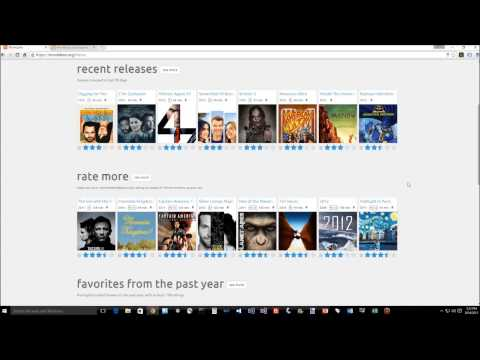

In [266]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

1. <name> <id>
2. <name> <id>
3. <name> <id>
4. <name> <id>
5. <name> <id>

**Objectives**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
    * http://grouplens.org/datasets/movielens/
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Useful Readings:**
* Chapter 14.2 (only the section on the MovieLens 1M Data Set), Chapter 5, 6.2, 7.2, 8, and 9 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (View pivately on Google Classroom).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)

**NOTE**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

# Problem 1:

## Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
* Store the data into an HDF5 file. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html
    * https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html

In [267]:
from google.colab import drive
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [268]:
# To mount at google drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [269]:
ratings_dat = pd.read_table("/content/drive/MyDrive/Colab Notebooks/dataware/ratings.dat", sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'])
movies_dat = pd.read_table("/content/drive/MyDrive/Colab Notebooks/dataware/movies.dat", sep="::", header=None, names=['MovieID','Title','Genres'],encoding = "ISO-8859-1")
users_dat = pd.read_table("/content/drive/MyDrive/Colab Notebooks/dataware/users.dat", sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'])

<ipython-input-269-acac4d77af87>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings_dat = pd.read_table("/content/drive/MyDrive/Colab Notebooks/dataware/ratings.dat", sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'])
<ipython-input-269-acac4d77af87>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_dat = pd.read_table("/content/drive/MyDrive/Colab Notebooks/dataware/movies.dat", sep="::", header=None, names=['MovieID','Title','Genres'],encoding = "ISO-8859-1")
<ipython-input-269-acac4d77af87>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine d

In [270]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
df = ratings_dat.merge(movies_dat, how="left", on='MovieID')
df_use =df.merge(users_dat, how="left", on='UserID')
#-------------------------------
# Create a HDF5
ratings_dat.to_hdf('data.h5', key='rating')
movies_dat.to_hdf('data.h5', key='movie')
users_dat.to_hdf('data.h5', key='user')
df_use.to_hdf('data.h5', key='data_use')
#pd.read_hdf('data.h5', key= 'data_use')

In [271]:
#import pandas as pd
#pd.read_table("/content/drive/MyDrive/Classroom/DataWarehouseandBigDataAnalytics/users.dat", sep="::", header=None, names=['X'+str(i) for i in range(1,6)])

## Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures(สร้างสิ่งที่อธิบายสมมุติฐาน) about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!

In [272]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
#How many movies have an average rating over 4.5 overall?
average_rating = df_use[['Title','Rating']].groupby('Title').mean('Rating')
#How many movies have an average rating over 4.5 among men?  How about women?
gender_rating=df_use[['Title','Gender','Rating']]
M_rating = gender_rating[gender_rating['Gender']== 'M']
F_rating = gender_rating[gender_rating['Gender']=='F']
average_rating_M = M_rating.groupby('Title').mean()
average_rating_F = F_rating.groupby('Title').mean()
#How many movies have an median rating over 4.5 among men over age 30? How about women over age 30?
Age_rating=df_use[['Title','Age','Gender','Rating']]
over_age_30_M_rating = Age_rating[(Age_rating['Gender']== 'M') & (Age_rating['Age'] > 30)]
over_age_30_F_rating = Age_rating[(Age_rating['Gender']== 'F') & (Age_rating['Age'] > 30)]
median_rating_M = over_age_30_M_rating.groupby('Title').median()
median_rating_F = over_age_30_F_rating.groupby('Title').median()
#What are the ten most popular movies?
popular_movies_rating=df_use[['Title','Age','Gender','Rating']]
popular_movies_rating_5=popular_movies_rating[popular_movies_rating['Rating'] == 5 ]
popular_movies = popular_movies_rating_5[['Title','Rating']].groupby('Title').count().sort_values(by='Rating',ascending = False)

<ipython-input-272-d658bb63a804>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_rating_M = M_rating.groupby('Title').mean()
<ipython-input-272-d658bb63a804>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_rating_F = F_rating.groupby('Title').mean()
<ipython-input-272-d658bb63a804>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_rating_M = over_age_30_M_rating.groupby('Title').median()
<

#ANS 1

In [273]:
#How many movies have an average rating over 4.5 overall?
average_rating[average_rating['Rating'] > 4.5].count()

Rating    21
dtype: int64

In [274]:
#How many movies have an average rating over 4.5 among men?
average_rating_M[average_rating_M['Rating'] > 4.5].count()

Rating    23
dtype: int64

In [275]:
#How many movies have an average rating over 4.5 among women?
average_rating_F[average_rating_F['Rating'] > 4.5].count()

Rating    51
dtype: int64

In [276]:
median_rating_M[median_rating_M['Rating'] > 4.5].count()

Age       86
Rating    86
dtype: int64

In [277]:
median_rating_F[median_rating_F['Rating'] > 4.5].count()

Age       149
Rating    149
dtype: int64

In [278]:
popular_movies.head(5)

,Rating
Title,
American Beauty (1999),1963
Star Wars: Episode IV - A New Hope (1977),1826
Raiders of the Lost Ark (1981),1500
Star Wars: Episode V - The Empire Strikes Back (1980),1483
"Godfather, The (1972)",1475


### เราคาดเดาว่ากลุ่ม คนที่ดู Godfather, The ส่วนมากเป็น คนอายุเกิน 56 ปี

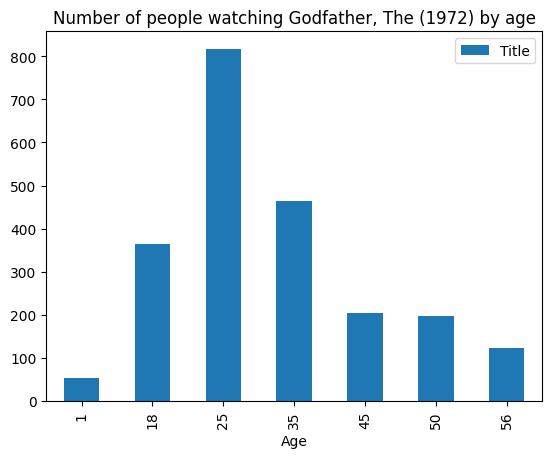

In [279]:
conjecture_1 = df_use[['Title','Age']]
conjecture_1_godf = conjecture_1[conjecture_1['Title']=='Godfather, The (1972)']
conjecture_1_count = conjecture_1_godf.groupby('Age').count()
conjecture_1_count.plot(kind='bar',title='Number of people watching Godfather, The (1972) by age')
plt.show()

# Problem 2: Expand your investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.**
* Plot a histogram of the ratings of all movies.
* Plot a histogram of the *number* of ratings each movie recieved.
* Plot a histogram of the *average rating* for each movie.
* Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

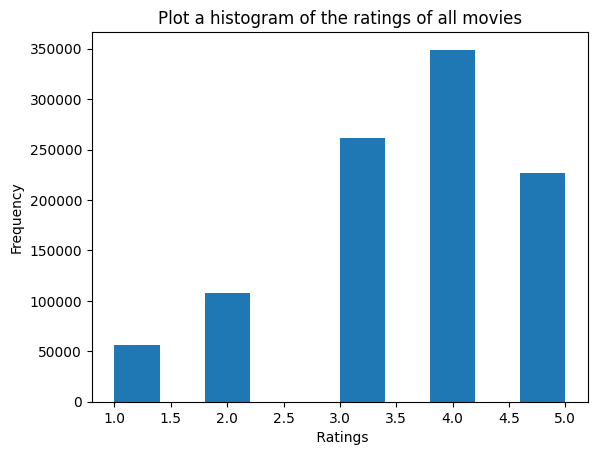

In [322]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
#Plot a histogram of the ratings of all movies
df_histLL = df_use[['Title','Rating']]
df_histLL = df_histLL.set_index('Title')
plt.hist(df_histLL)
plt.title('Plot a histogram of the ratings of all movies')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

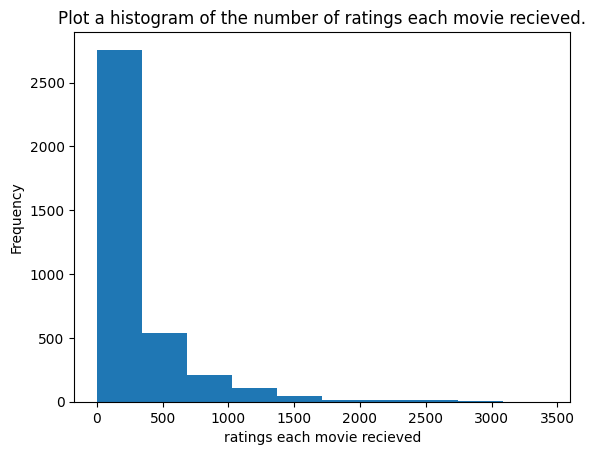

In [323]:
#Plot a histogram of the number of ratings each movie recieved.
df_hist = df_use[['Title','Rating']]
df_use_hist = df_hist.groupby('Title').count().sort_values(by='Rating',ascending = False)
plt.hist(df_use_hist)
plt.title('Plot a histogram of the number of ratings each movie recieved.')
plt.xlabel('ratings each movie recieved')
plt.ylabel('Frequency')
plt.show()

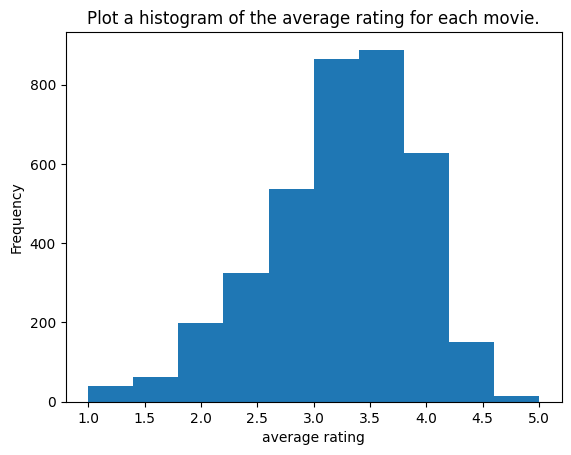

In [324]:
#Plot a histogram of the average rating for each movie.
df_hist_A = df_use[['Title','Rating']]
df_use_hist_A = df_hist_A.groupby('Title').mean()
plt.hist(df_use_hist_A)
plt.title('Plot a histogram of the average rating for each movie.')
plt.xlabel('average rating')
plt.ylabel('Frequency')
plt.show()

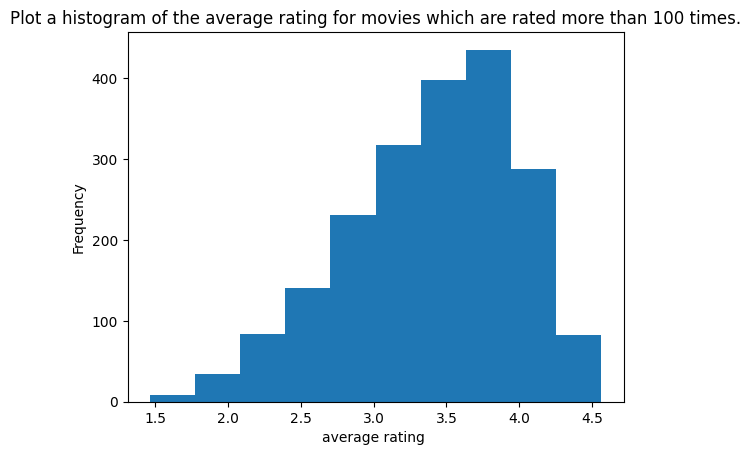

In [325]:
#Plot a histogram of the average rating for movies which are rated more than 100 times.
df_hist2 = df_use[['MovieID','Rating']]
df_use_hist2 = df_hist2.groupby('MovieID').count().sort_values(by='Rating',ascending = False)
df_use_hist_100_MA = df_hist2.groupby('MovieID').mean()
df_use_hist_100_MARe = df_use_hist_100_MA.reset_index()
df_use_hist_100 = df_use_hist_100_MARe.merge(df_use_hist2,how = 'left',on='MovieID')
df_use_hist_100forplot = df_use_hist_100[df_use_hist_100['Rating_y'] >= 100]
use_full = df_use_hist_100forplot[['MovieID','Rating_x']]
use_full = use_full.set_index('MovieID')
plt.hist(use_full)
plt.title('Plot a histogram of the average rating for movies which are rated more than 100 times.')
plt.xlabel('average rating ')
plt.ylabel('Frequency')
plt.show()

In [308]:
(df_use_hist_100forplot < 100).any()

MovieID      True
Rating_x     True
Rating_y    False
dtype: bool

#test code

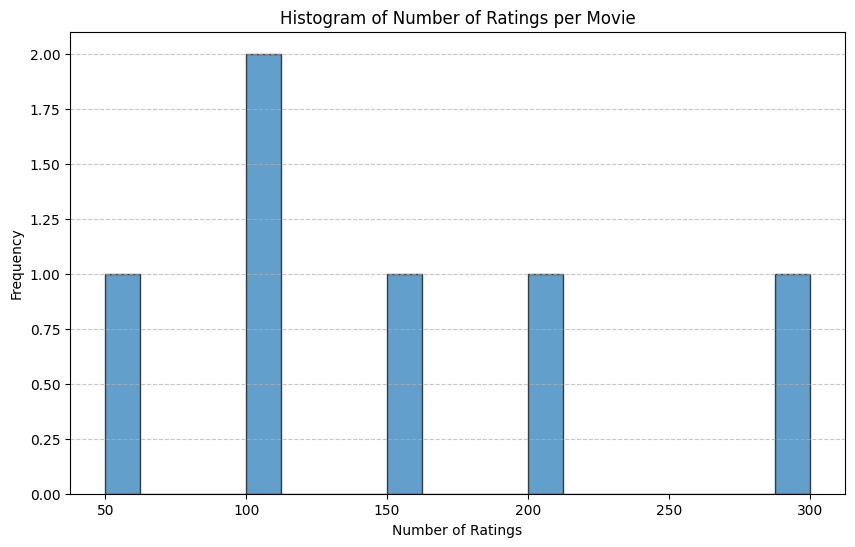

In [286]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a 'movie_id' and 'num_ratings' column
# Replace this with your actual DataFrame and column names

# Example DataFrame
data = {'movie_id': [1, 2, 3, 4, 5,6],
        'num_ratings': [100, 200, 150, 300, 50,100]}

df = pd.DataFrame(data)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['num_ratings'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [317]:
df_histLL

,Rating
Title,
One Flew Over the Cuckoo's Nest (1975),5
James and the Giant Peach (1996),3
My Fair Lady (1964),3
Erin Brockovich (2000),4
"Bug's Life, A (1998)",5
...,...
Weekend at Bernie's (1989),1
"Crying Game, The (1992)",5
Welcome to the Dollhouse (1995),5



# Problem 3:
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* Make a scatter plot of men versus women and their mean rating for every movie.
* Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [287]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

### A scatter plot of men versus women and their mean rating for every movie

In [288]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




### A scatter plot of men versus women and their mean rating for movies rated more than 200 times

In [289]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




### The correlation coefficent between the ratings of men and women

In [290]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




## Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender

Example<br>
Conjecture 1: Men and women are more similar when they are older, consider their rating over the same genres.

Conjecture 2: Men and women more similar when they are academic/educator, artist, college/grad student, and programmer.

Conjecture 3: Men and women more similar when they watch Action, Drama, War, and Triller.

In [291]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




# Problem 4:
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

### For example, which movie to make/buy? (seperating via Genre?)

In [292]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




# Done!

**What do you need to submit?**

* **Notebook File**: This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.


* **PPT Slides**: please prepare PPT slides (10 minutes)
    * Motivation about the data collection, why the topic is interesting to you. อธิบายเกี่ยวกับข้อมูล สร้างแรงบันดาลใจเดี่ยวกับข้อมูลให้ผู้รับฟัง ให้ผู้ฟังเข้าใจความเป็นมาและความสำคัญของข้อมูล
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What conjectures did you make and how did you support or disprove them using data?
    * Communicating Results with figures or tables
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report)
     
**How to submit:**

        ส่ง link ของ ipynb และ slides ในรูปแบบ pdf ใน Google Classroom
        
**Note: Each team just needs only one submission**